CNN Exp 1 E vs S
NO optimser

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # E(n folder)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # E (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S, label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model (no optimizer specified)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5397 - loss: 759.6826 - val_accuracy: 0.4833 - val_loss: 290.1224
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.4733 - loss: 176.8864 - val_accuracy: 0.5667 - val_loss: 8.1939
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.5906 - loss: 42.9371 - val_accuracy: 0.8333 - val_loss: 1.5372
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 0.7014 - loss: 9.9203 - val_accuracy: 0.9667 - val_loss: 0.2513
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 851ms/step - accuracy: 0.7964 - loss: 9.2981 - val_accuracy: 0.9500 - val_loss: 0.3112
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 750ms/step - accuracy: 0.8747 - loss: 1.6556 - val_accuracy: 0.9000 - val_loss: 0.7956
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.9404 - loss: 0.4308 - val_accuracy: 0.9833 - val_loss: 0.2825
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 528ms/step - accuracy: 0.8851 - loss: 3.8469 - val_accuracy: 0.6167 - val_l

With Standerscaler

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 859ms/step - accuracy: 0.4768 - loss: 2.4730 - val_accuracy: 0.7333 - val_loss: 0.5200
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 549ms/step - accuracy: 0.5340 - loss: 0.9867 - val_accuracy: 1.0000 - val_loss: 0.3073
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 825ms/step - accuracy: 0.9740 - loss: 0.3063 - val_accuracy: 0.9833 - val_loss: 0.1912
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.9762 - loss: 0.1911 - val_accuracy: 0.9333 - val_loss: 0.1688
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 516ms/step - accuracy: 0.9820 - loss: 0.1170 - val_accuracy: 0.8833 - val_loss: 0.3074
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 700ms/step - accuracy: 0.9549 - loss: 0.1235 - val_accuracy: 0.9833 - val_loss: 0.0798
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step - accuracy: 1.0000 - loss: 0.0565 - val_accuracy: 1.0000 - val_loss: 0.0535
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.9868 - loss: 0.0457 - val_accuracy: 0.9833 - val_loss:

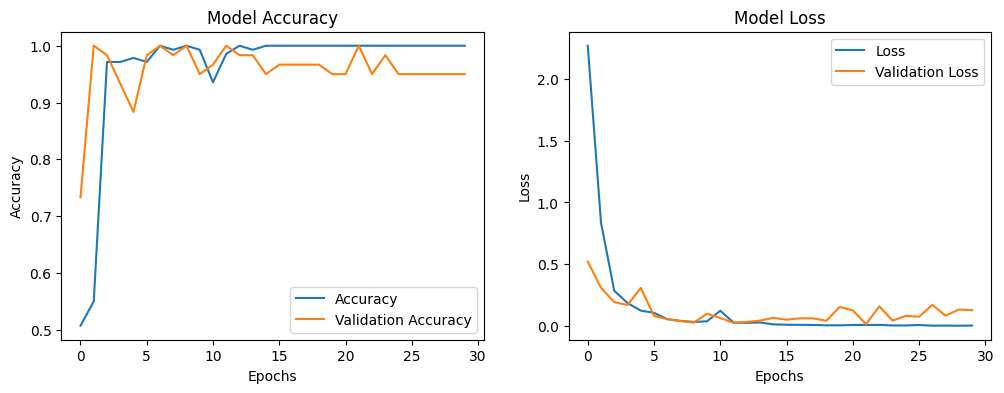

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # E(n folder)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # E (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S, label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Standardize the data
    scaler = StandardScaler()
    data_all = scaler.fit_transform(data_all)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model (no optimizer specified)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


With optimiser

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 860ms/step - accuracy: 0.5327 - loss: 183.1836 - val_accuracy: 0.4833 - val_loss: 222.8227
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.5388 - loss: 200.9814 - val_accuracy: 0.4833 - val_loss: 69.1967
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step - accuracy: 0.6654 - loss: 48.9947 - val_accuracy: 0.8833 - val_loss: 15.5264
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.7901 - loss: 8.9908 - val_accuracy: 0.5833 - val_loss: 6.3806
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 848ms/step - accuracy: 0.6509 - loss: 4.4970 - val_accuracy: 0.7167 - val_loss: 1.2915
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 561ms/step - accuracy: 0.7929 - loss: 2.6656 - val_accuracy: 0.5500 - val_loss: 2.7439
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 532ms/step - accuracy: 0.6251 - loss: 1.5553 - val_accuracy: 0.7333 - val_loss: 0.8342
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 812ms/step - accuracy: 0.9449 - loss: 0.1750 - val_accuracy: 0.8167 - 

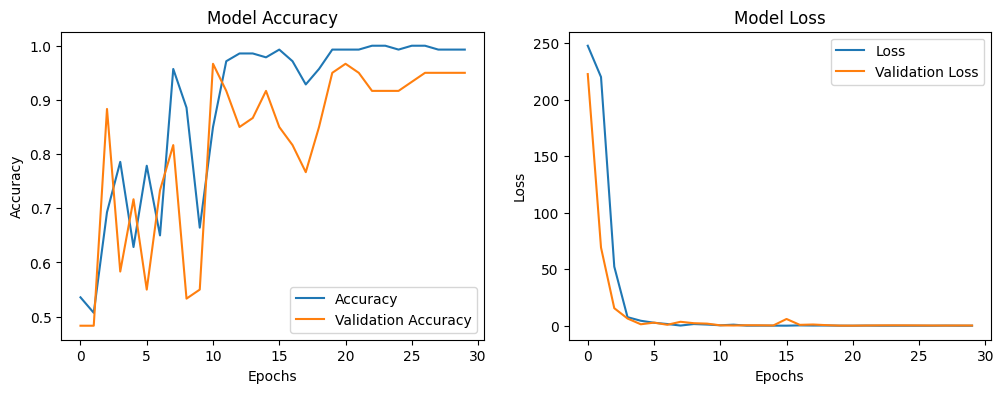

In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # E(n folder)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # E (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (S, label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train[..., np.newaxis], y_train, epochs=30, batch_size=32, validation_data=(X_test[..., np.newaxis], y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test[..., np.newaxis])
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


Both Optmiser and Standa

In [6]:
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

# Function to load data from a directory
def load_data_from_directory(directory_path, label):
    data = []
    labels = []

    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"Error: Directory {directory_path} not found.")
        return np.array([]), np.array([])

    # List all files in the directory
    files = [f for f in os.listdir(directory_path) if f.lower().endswith('.txt')]  # Only .txt files

    if len(files) == 0:
        print(f"No .txt files found in {directory_path}.")
        return np.array([]), np.array([])

    # Load data from each file
    for filename in files:
        file_path = os.path.join(directory_path, filename)
        try:
            file_data = np.loadtxt(file_path)
            data.append(file_data)
            labels.append(label)
        except Exception as e:
            print(f"Error loading {filename}: {e}")

    return np.array(data, dtype=np.float32), np.array(labels)

# Paths to your datasets
path_E = '/content/drive/My Drive/PFA2_DataSet/DataSet/Elipy/N'  # Elipy (E)
path_S = '/content/drive/My Drive/PFA2_DataSet/DataSet/Seizeur/S'  # Seizeur (S)

# Load data
data_E, labels_E = load_data_from_directory(path_E, label=0)  # Elipy (label 0)
data_S, labels_S = load_data_from_directory(path_S, label=1)  # Seizure (label 1)

# Combine data and labels
if data_E.size > 0 and data_S.size > 0:
    data_all = np.concatenate((data_E, data_S), axis=0)
    labels_all = np.concatenate((labels_E, labels_S), axis=0)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_all, labels_all, test_size=0.3, random_state=42)

    # Normalize data using StandardScaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Reshape data for the CNN model (add an extra dimension for channels)
    X_train = X_train[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    # Define the CNN model for 1D input
    model = Sequential([
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')  # Binary classification (0 for E, 1 for S)
    ])

    # Compile the model with the Adam optimizer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model (reduced epochs for faster execution)
    history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

    # Evaluate the model
    y_pred = model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to class labels

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)  # Sensitivity
    precision = precision_score(y_test, y_pred_classes)
    conf_matrix = confusion_matrix(y_test, y_pred_classes)

    # Specificity calculation
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp)

    # Print metrics
    print("\nFinal Evaluation Metrics:")
    print("Test Accuracy: ", accuracy)
    print("Test Recall (Sensitivity): ", recall)
    print("Test Precision: ", precision)
    print("Test Specificity: ", specificity)
    print("Confusion Matrix: \n", conf_matrix)

    # Plot Training History
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

else:
    print("Error: Data loading failed. Ensure the files are present in the directories.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 268ms/step - accuracy: 0.4180 - loss: 1.0443 - val_accuracy: 0.4833 - val_loss: 0.4884
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.6494 - loss: 0.5210 - val_accuracy: 1.0000 - val_loss: 0.3966
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 198ms/step - accuracy: 0.9735 - loss: 0.4041 - val_accuracy: 0.9833 - val_loss: 0.3545
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.9558 - loss: 0.3241 - val_accuracy: 1.0000 - val_loss: 0.2818
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - accuracy: 0.9757 - loss: 0.2760 - val_accuracy: 0.9667 - val_loss: 0.1841
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.9872 - loss: 0.1741 - val_accuracy: 0.9833 - val_loss: 0.1050
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - accuracy: 0.9926 - loss: 0.0981 - val_accuracy: 0.9667 - val_loss: 0.0835
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 323ms/step - accuracy: 0.9631 - loss: 0.0913 - val_accuracy: 1.0000 - val_loss: